# INFO-F-422 -  Statistical Foundations of Machine Learning 

### De Vos Sebastien - __[Sebastien.De.Vos@ulb.be](mailto:sebastien.de.vos@ulb.be) - Student ID 459907__
### Kalai Tarik - __[Tarik.Kalai@ulb.be](mailto:Tarik.Kalai@ulb.be) - Student ID 459631__
### Rubas Diego - __[Diego.Rubas@ulb.be](mailto:diego.rubas@ulb.be) - Student ID 459733__

### Video presentation: www.youtube.com/abcd1234
good source : https://www.heatonresearch.com/2017/06/01/hidden-layers.html
## Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines
 


# Table of Contents

* [Introduction](#Introduction)
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
    * [Data Loading](#Data_Loading)
    * [Data Dimension](#Data_Dimension)
    * [Data Preview](#Data_Preview)
* [Data Preprocessing](#Data_Preprocessing)
    * [Missing Value Imputation](#Missing_Value_Imputation)
    * [Feature Engineering](#Feature_Engineering)
    * [Feature Selection](#Feature_Selection)
* [Model Selection](#Model_Selection)
    * [Model 1: Linear Model](#Model_1_Linear_Model)
    * [Model 2: Decision Tree](#Model_2_Decision_Tree)
        [Model 2.1: Bossted Decision Tree](#Model_2_1_Boosted_Decision_Tree)
    * [Model 3: Random Forest](#Model_3_Random_Forest)

# Introduction <a class="anchor" id="Introduction"></a>

4 different models will be used to predic if either a person received the h1n1 vaccine or/and the seasonnal flu vaccine.
The four different models are: 

  * Linear Regression Model. 
  * Decision Tree Model.
    * Boosted version.
  * Random Forest.
  * Neural Network.


### Seed for the project

In [1]:
set.seed(12345)

# Exploratory Data Anaylsis <a class="anchor" id="Exploratory_Data_Analysis"></a>

In this section we will be viewing and understanding the data. 

## Data loading <a class="anchor" id="Data_Loading"></a>

In [2]:
training_set_features <- read.csv("sample_data/training_set_features.csv", stringsAsFactors  = T)
training_set_labels <- read.csv("sample_data/training_set_labels.csv", stringsAsFactors  = T)
test_set_features <- read.csv("sample_data/test_set_features.csv", stringsAsFactors  = T)
submission_format <- read.csv("sample_data/submission_format.csv", stringsAsFactors  = T)

## Dimensions of the data samples. <a class="anchor" id="Data_Dimension"></a>

We realised that the *training_set_labels* is the known prediction that will be used to train our models with the *training_set_features*.
What will have to be uploaded on the DrivenData website is the prediction of the *test_set_features* which has to correspond to the format of *submission_format*. 

In [3]:
cat("dimension of training_set_features : ", dim(training_set_features), "\n")
cat("dimension of training_set_labels: ", dim(training_set_labels), "\n")
cat("dimension of test_set_features: ",  dim(test_set_features), "\n")
cat("dimension of submission_format : ", dim(submission_format), "\n")

dimension of training_set_features :  26707 36 
dimension of training_set_labels:  26707 3 
dimension of test_set_features:  26708 36 
dimension of submission_format :  26708 3 


## Data Preview <a class="anchor" id="Data_Preview"></a>

In [4]:
head(training_set_features)
head(training_set_labels)

respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,,
1,3,2,0,1,0,1,0,1,1,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0,pxcmvdjn,xgwztkwe
2,1,1,0,1,0,0,0,0,0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2,0,rucpziij,xtkaffoo
3,1,1,0,1,0,1,1,0,0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0,,
4,2,1,0,1,0,1,1,0,1,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0,wxleyezf,emcorrxb
5,3,1,0,1,0,1,0,0,1,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2,3,saaquncn,vlluhbov


respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
5,0,0


# Data preprocessing <a class="anchor" id="Data_Preprocessing"></a>

In this part, all the different methods to pre-process the data are listed : 

* cleanData: clean the first 22 binary features, as they are integers if there are missing datas ("NA") then they will be replaced by the mean value while considering the standard deviation.  
* transform_na: compute the mean and standard deviation and replace the "NA" by 
\begin{equation*}
x(NA) = \bar{x} + \sigma(x)/2
\end{equation*}

* norm: Compute the norm for a given feature to normalize its values. 
* one_hot_encoding: Way to deal with the categorical features in order to make them usable for some models (Linear Regression modeling for example.)
* cast_into_double: cast a given feature into double in order to respect the format of the submission format. 

In [5]:
cleanData <- function(x) {
    for (i in 2:22) {
        x <- transform_na(x, i)
    }
    return(x)
}

transform_na <- function(x, index){
    if (length(which(is.na(x[,index]))) > 0){ #Check if there is any NA in the column
            mean_ts <- mean(x[,index], na.rm = T) #compute old_mean
            sd_ts <- sqrt(var(x[,index], na.rm = T)) #compute old_sd
            x[is.na(x[,index]), index] <- round(mean_ts + sd_ts/2) #modify the data
        }
    return(x)
}

norm<-function(x){
    return( (x-min(x)) / (max(x)-min(x)) )
}

one_hot_encoding <- function(x, index) {
    names <- levels(x[,index]) # get the names of all the possible different values
    new_col <- model.matrix(~0+x[,index]) # transforms the column in a matrix with a '1' in the correct column and '0' otherwise
    attr(new_col, "dimnames")[[2]] <- names
    new_col <- as.data.frame(new_col)
    x <- data.frame(x[1:index-1],new_col,x[(index+1):ncol(x)])
    return(x)
}

cast_into_double <- function(x){
    for (i in 2:length(x)){
        x[,i] <- as.numeric(x[,i])
    }
    return(x)
}



## Data Processing for each feature<a class="anchor" id="Data_Processing_For_Each_Feature"></a>

The data was handled as follows: 

* feature 1: This feature is used as id and does not need any cleaning. 
* feature 2 -> 22, 33, 34: These features are integers,the only subtlety was that "NA" values needed to be replaced. 
* features 23, 24, 27 : As there was ordering in this data, integer encoding was applied to it.
* features 25, 26, 28, 29, 30, 32 : For these categorical features, one hot encoding was applied.
* features 31, 35, 36: These features were considered useless (too many missing values). 

The data sorting function is general so it can be applied to the *test_set_features*. 

In [6]:

data_sorting <- function(x){

    # for feature 2 -> 22
    x <- cleanData(x)

    # for feature 23
    levels(x[,23]) <- c(1, 2, 3, 4, 5)

    # for feature 24
    levels(x[,24]) <- c(0, 1, 2, 4, 3)

    # for feature 25
    x <- one_hot_encoding(x, 25)

    # for feature 26 -> number 29
    x <- one_hot_encoding(x, 29)

    # for feature 27 -> number 31 !!! it need to be changed, it is not a good way to sort this data.
    levels(x[,31]) <- c(0, 2, 1, 3) 

    # for feature 28 -> number 32
    levels(x[,32])[1] <- 'marital_status_not_specified'
    x <- one_hot_encoding(x, 32)

    # for feature 29 -> number 35
    levels(x[,35])[1] <- 'rental_not_specified'
    x <- one_hot_encoding(x, 35)

    #for features 30 -> number 38
    levels(x[,38])[1] <- 'employment_not_specified'
    x <- one_hot_encoding(x, 38)
    
    # for feature 31 -> 42, we judged its contribution was negligeable against its cost of implementation
    x <- subset(x, select = -42)

    # for feature 32 -> 42 (since we dropped last column
    x <- one_hot_encoding(x, 42)

    # for feature 33 -> 45
    x <- transform_na(x, 45)

    # for feature 34 -> 46
    x <- transform_na(x, 46)

    # for feature 35 -> 47, we judged its contribution was negligeable against its cost of implementation
    x <- subset(x, select = -47)

    # for feature 36 -> 47, we judged its contribution was negligeable against its cost of implementation
    x <- subset(x, select = -47)

    x <- cast_into_double(x)
    name <- names(x)[-1]
    temp <- apply(x[2:length(x)], 2 , norm)
    attr(temp, "dimnames")[[2]] <- name
    x <- data.frame(x[1],as.data.frame(temp))
    return (x)
}

training_sf <- data_sorting(training_set_features)
test_sf <- data_sorting(test_set_features)

cat("Preview of the training_set_feature: \n")
head(training_sf)
cat("Dimension of training_set_feature: \n")
dim(training_sf)

Preview of the training_set_feature: 


respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,Rent,employment_not_specified,Employed,Not.in.Labor.Force,Unemployed,MSA..Not.Principle..City,MSA..Principle.City,Non.MSA,household_adults,household_children
0,0.3333333,0.0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0.0000000,0
1,1.0000000,1.0,0,1,0,1,0,1,1,...,1,0,1,0,0,1,0,0,0.0000000,0
2,0.3333333,0.5,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0.6666667,0
3,0.3333333,0.5,0,1,0,1,1,0,0,...,1,0,0,1,0,0,1,0,0.0000000,0
4,0.6666667,0.5,0,1,0,1,1,0,1,...,0,0,1,0,0,1,0,0,0.3333333,0
5,1.0000000,0.5,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0.6666667,1


Dimension of training_set_feature: 


[1] 26707    46


## Feature Engineering<a class="anchor" id="Feature_Engineering"></a>

TODO



## Feature Selection<a class="anchor" id="Feature_Selection"></a>

TODO

In [7]:
accuracyFromConfusionMatrix <- function(confusion_matrix){
    if(dim(confusion_matrix)[1] != 2){
        confusion_matrix <- rbind(confusion_matrix,c(0,0))
    }
    return((confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix))
}

computeResults <- function(Y,Y_hat,explanatory_string="",verbose=TRUE){
    confusion_matrix <- table(Y_hat,Y)
    accuracy <- accuracyFromConfusionMatrix(confusion_matrix)
    misclassification_rate <- 1 - accuracy
    if(verbose){
        print(paste("[INFO] - Confusion matrix",explanatory_string,":"))
        print(confusion_matrix)
        print(paste("[INFO] - Accuracy",explanatory_string,":",accuracy))
        print(paste("[INFO] - Misclassification rate",explanatory_string,":",misclassification_rate))
    }
    return(accuracy)
}

# Model selection <a class="anchor" id="Model_Selection"></a>



## Model 1 : Linear Regression <a class="anchor" id="Model_1_Linear_Model"></a>

For the first model we decided to go with a linear regreassion. 
Thus there has been a selection on the features, some feature where to correlated (notably, all the one which were "one hot encoded"), and thus have been removed. This corresponds to the features : 

* 27 -> race = Other.or.Multiple 
* 30 -> sexe = male
* 33 -> marital status = not specified
* 35 -> rent or own = rental_not_specified
* 38 -> employement  = employment_not_specified
* 44 -> census_msa = Non.MSA

The training_set_features cleaned has been put into a matrix appended with a first column of only ones. This colmumns will corresponds to the beta_0 coefficient.
We have then computed the beta_hat, so the estimation of the the coefficient for each feature. The prediction could then be made and a confusion matrix has been build.
With the same bata_hat, prediction for the test_set_features has been made and uploaded on the drivenData web site the values for the 

In [8]:
temp <- training_sf[-c(1, 16, 27, 30, 32, 35, 38, 44)] # i just looked at which one made the computation impossible in a greedy manner.

n <- length(temp) # number of features
p <- n+1
N <- length(temp[,1]) # number of samples
N2 <- length(test_sf[,1])
Y <- as.matrix(training_set_labels[2:3])
Y_bar <- apply(Y, 2, mean)
X <- as.matrix(cbind(array(1,c(N,1)),temp))

beta_hat <- array(0, c(p,2))
sigma_hat_w <- numeric(2)
Y_hat <- array(0, c(N,2))


temp_2  <- test_sf[-c(1, 16, 27, 30, 32, 35, 38, 44)]
X_final <-  as.matrix(cbind(array(1,c(N2,1)),temp_2))
Y_final <- array(0, c(N2,2))

my_tables <- list(table(Y_hat[,1], Y[,1]), table(Y_hat[,2], Y[,2]))
threshold <- 0.5

for (i in 1:2){
    beta_hat[,i] <- solve((t(X)%*%X))%*%t(X)%*%Y[,i] #doesn't work, we need to identify the features that are highly correlated and keep only one. 
    Y_hat[,i] <- X %*% beta_hat[,i]
    Y_final[,i] <- X_final %*% beta_hat[,i]
    e <- Y[,i] - Y_hat[,i]
    sigma_hat_w[i] <- sqrt((t(e)%*%e)/(N-p))
    Y_hat[,i] <- ifelse(Y_hat[,i] > threshold,1,0) 
    my_tables[[i]] <- table(Y_hat[,i], Y[,i])
}

In [9]:
print(paste("confusion matrix for h1n1_vaccine : "))
my_tables[[1]]
#sigma_hat_w[1]
confusion_matrix <- my_tables[[1]]
accuracy = (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)
misclassification_rate = 1 - accuracy
print(paste("misclassification rate for the h1n1_vaccine : ", misclassification_rate))
cat("\n")

print(paste("confusion matrix for seasonal_vaccine : "))
my_tables[[2]]
#sigma_hat_w[2]
confusion_matrix <- my_tables[[2]]
accuracy = (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)
misclassification_rate = 1 - accuracy
print(paste("misclassification rate for the seasona_vaccine : ", misclassification_rate))

[1] "confusion matrix for h1n1_vaccine : "


   
        0     1
  0 19947  3418
  1  1086  2256

[1] "misclassification rate for the h1n1_vaccine :  0.168644924551616"

[1] "confusion matrix for seasonal_vaccine : "


   
        0     1
  0 11358  3366
  1  2914  9069

[1] "misclassification rate for the seasona_vaccine :  0.235144344179429"


In [10]:

Y_final<-ifelse(Y_final<=0,0.01,Y_final)
Y_final<-ifelse(Y_final>=1,0.99,Y_final)

submission <- data.frame(submission_format[1],Y_final)
colnames(submission)[2:3] <- c(names(submission_format[2:3]))
cat("\n")
print(paste("prediction for the test_set_features :"))
head(submission)
write.csv(submission, "sample_data/linear_submission.csv", row.names = FALSE, quote=FALSE)



[1] "prediction for the test_set_features :"


respondent_id,h1n1_vaccine,seasonal_vaccine
26707,0.05939051,0.2265298
26708,0.02229845,0.0100000
26709,0.37910535,0.6033765
26710,0.50196139,0.8580803
26711,0.24910558,0.4814923
26712,0.42392390,0.9010986


### F - test

- **Hypothesis**: $\beta_i=0$ for i > 1
- **Test statistic**: $\frac{SS_{mod}}{SS_{res}/(N-2)} \sim F_{1,N-2} $

[1] "F-test result: F.value=  18543.028231883"
[1] "Pr[F >= F.value]=  0"


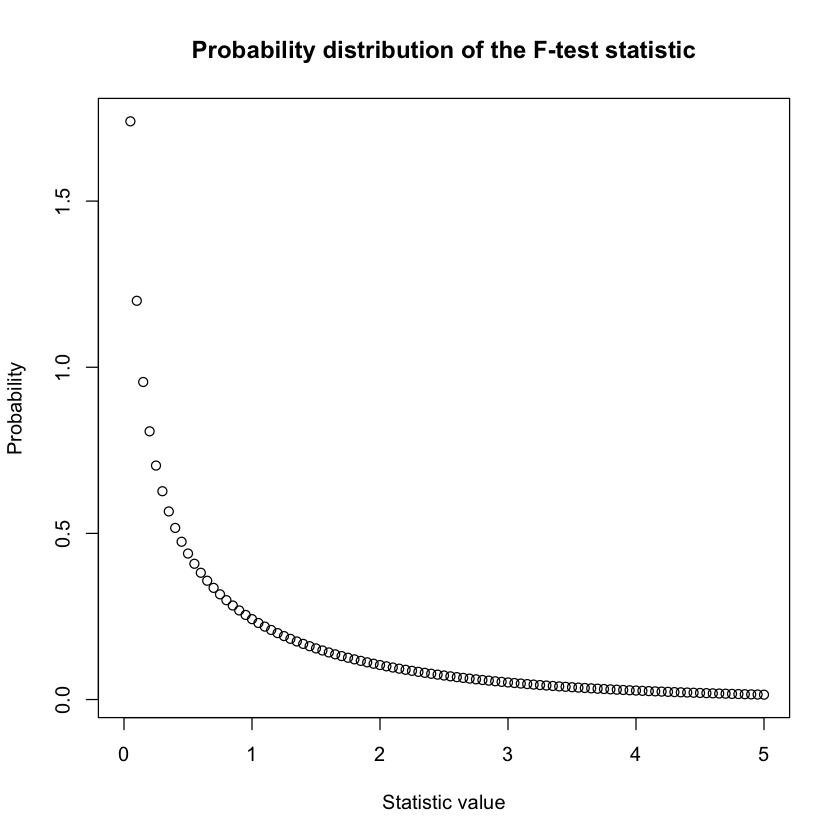

In [11]:
SS_mod <- sum((Y_hat[,1]-Y_bar[1])^2)
SS_res <- sum((Y[,1]-Y_hat[,1])^2)
F_stat <- SS_mod / (SS_res/(N-2))
F_prob <- (1-pf(F_stat,df1=1,df2=N-2))
I <- seq(0,5,0.05)
plot(I,df(I,df1=1,df2=N-2),xlab="Statistic value",ylab="Probability",main="Probability distribution of the F-test statistic")
abline(v=F_stat,col="red")
print(paste("F-test result: F.value= ",F_stat))
print(paste("Pr[F >= F.value]= ", F_prob))

In [12]:
print(paste("F-test result: F.value= ",F_stat))
print(paste("Pr[F >= F.value]= ", F_prob))

[1] "F-test result: F.value=  18543.028231883"
[1] "Pr[F >= F.value]=  0"



## Model 2 <a class="anchor" id="Model_2_Random_Forest"></a>

For the second model, the model of choice was **Random Forests**. Random Forests is an ensemble learning method used for classification and regression that operates by building a multitude of decision trees.

A decision tree is a model employing a tree-based structure in order to perform classification. The classification is performed by traversing the tree. At each branch of the tree, a decision according to the value associated to the corresponding feature is made, the outcome of which determines the path to be followed. Once a leaf is reached, the output of the classifier corresponds to the label associated to the terminal node.

The learning procedure has two steps known as **tree growing** and **tree pruning**.

The tree growing phase uses **Information Gain** in order to decide which feature to split on. For each branch of the tree, the information value measures *how much a feature tells us about the class*. The *split with the highest information gain will be taken as the first split*, and the process will continue until all leaves are pure (i.e. belong to a single class).

The tree pruning phase aims to remove the branches that make use of the *features having low importance* (information gain), thereby reducing the complexity of the tree.

Therefore, decision trees provide **automatic feature selection**, as only the most significant features (with regard to predicting the class) are kept. They also offer **improved interpretability** by virtue of its tree-based structure and the associated features at each branch, with *the most significant features at the top of the tree*.

Additionally, decision trees have an improved predictive accuracy by **reduction of overfitting** during to the pruning phase.

Random Forests is an ensemble learning technique combining bagging and random feature selection. It achieves this by using a large number of **non-pruned** decision trees. As a result, every single tree is trained on a different subset of samples (due to **bagging**) as well as a different subset of features (due to random feature **selection**). The random feature selection for every tree allows to decorrelate the predictions of different trees.

The aggregation of decorrelated classifiers allows to **reduce the variance** of the final prediction, with the number of classifiers is a compromise between training time and performance.

In the case of classification, the aggregation is performed by majority vote (i.e. the class that is predicted by the largest number of individual classifiers is selected as the prediction). In the case of regression, the aggregation is performed by performing the average of the individual predictions.

In order to determine an optimal number of trees, random forests have been implemented (with the "randomForest" library) with differing numbers of trees. Each random forest has been assessed with a 10-fold cross-validation process.

This process of determining the optimal number of trees has been done on the 2 target variables: **seasonal_vaccine** and **h1n1_vaccine**.

In [13]:
library("randomForest")

data_rf <- data.frame(training_sf[-c(1,16, 27, 30, 32, 35, 38, 44)], training_set_labels[2]) 

n_trees <- 50
k = 10

# 1. Shuffle the dataset randomly.
data_rf_idx <- sample(1:nrow(data_rf))

# 2. Split the dataset into k groups
max <- ceiling(nrow(data_rf)/k)
splits <- split(data_rf_idx , ceiling(seq_along(data_rf_idx)/max))

target_variable_rf <- ncol(data_rf)
mean_accuracy_vec <- array(0,n_trees)
accuracy_vec <- array(0,k)

for (i in 1:n_trees){ #print(i)
    for (j in 1:k){
        #3.1 Take the first half of the dataset as a training data set
        train_data <- data_rf[-splits[[j]],]

        #3.2 Take the second half of the dataset as a hold out or test data set
        test_data <- data_rf[splits[[j]],]
        
        model <- randomForest(x=train_data[,-c(target_variable)],
                              y=as.factor(train_data[,c(target_variable)]),
                              xtest=test_data[,-c(target_variable)],
                              ytest=as.factor(test_data[,c(target_variable)]),
                              ntree=i)
        
        accuracy_vec[j] <- (model$test$confusion[1,1]+model$test$confusion[2,2])/sum(model$test$confusion)
    }
    mean_accuracy_vec[i] <- mean(accuracy_vec)
}
plot(mean_accuracy_vec ,main = "Number of trees influence with 10-fold cv",xlab = "Nbr of trees",ylab = "Mean Classification rate")

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



ERROR: Error in `[.data.frame`(train_data, , -c(target_variable)): object 'target_variable' not found


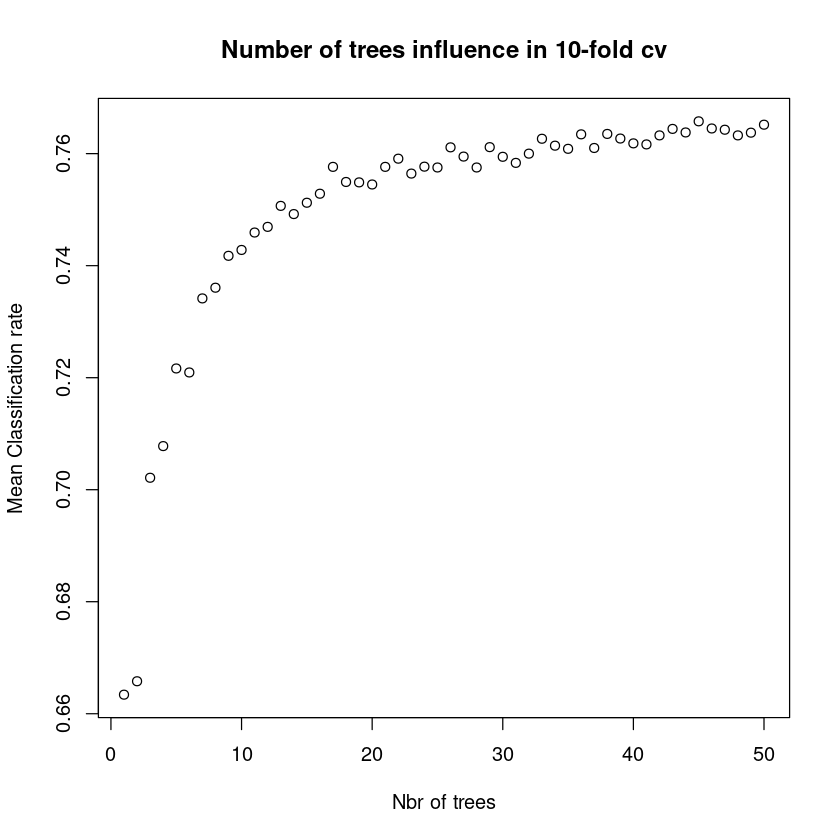

In [ ]:
library("randomForest")

data_rf <- data.frame(training_sf[-c(1,16, 27, 30, 32, 35, 38, 44)], training_set_labels[3]) 

n_trees <- 50
k = 10

# 1. Shuffle the dataset randomly.
data_rf_idx <- sample(1:nrow(data_rf))

# 2. Split the dataset into k groups
max <- ceiling(nrow(data_rf)/k)
splits <- split(data_rf_idx , ceiling(seq_along(data_rf_idx)/max))

target_variable_rf <- ncol(data_rf)
mean_accuracy_vec <- array(0,n_trees)
accuracy_vec <- array(0,k)

for (i in 1:n_trees){ #print(i)
    for (j in 1:k){
        #3.1 Take the first half of the dataset as a training data set
        train_data <- data_rf[-splits[[j]],]

        #3.2 Take the second half of the dataset as a hold out or test data set
        test_data <- data_rf[splits[[j]],]
        
        model <- randomForest(x=train_data[,-c(target_variable)],
                              y=as.factor(train_data[,c(target_variable)]),
                              xtest=test_data[,-c(target_variable)],
                              ytest=as.factor(test_data[,c(target_variable)]),
                              ntree=i)
        
        accuracy_vec[j] <- (model$test$confusion[1,1]+model$test$confusion[2,2])/sum(model$test$confusion)
    }
    mean_accuracy_vec[i] <- mean(accuracy_vec)
}
plot(mean_accuracy_vec ,main = "Number of trees influence in 10-fold cv",xlab = "Nbr of trees",ylab = "Mean Classification rate")

Unsurprisingly, the best results (with the lowest misclassification rate) for h1n1_vaccine and seasonal_vaccines were achieved with a large number of trees (44 trees and 45 trees respectively).

This is consistent with what was previously mentioned. In our random forest, we end up with trees trained on different sets of data (bagging) and therefore use different features (feature randomness) to make decisions. This creates an ensemble  of uncorrelated trees that *buffer and protect each other* from their errors, resulting in an **increased accuracy**.

Now that the optimal number of trees has been determined, the model will be implemented using this optimal number of trees and a 50-50 training-testing set split.


In [ ]:
library("randomForest")

submission <- data.frame(submission_format[1])
n_trees <- c(44,45)

for (i in 1:2) {
    data_rf <- data.frame(training_sf[-c(1, 16, 27, 30, 32, 35, 38, 44)], training_set_labels[i+1]) 
    trees <- n_trees[i]

    data_rf_idx <- sample(1:nrow(data_rf))
    half_split <- floor(nrow(data_rf)/2)
    target_variable <- ncol(data_rf)

    train_data <- data_rf[data_rf_idx[1:half_split],]

    test_data <- data_rf[data_rf_idx[(half_split+1):nrow(data_rf)],]
        
    model <- randomForest(x=train_data[,-c(target_variable)],
                            y=train_data[,c(target_variable)],
                            xtest=test_data[,-c(target_variable)],
                            ytest=test_data[,c(target_variable)],
                            ntree=trees, 
                            keep.forest=TRUE)

    Y_pred <- predict(model,test_sf[-c(1, 16, 27, 30, 32, 35, 38, 44)])
    Y_pred<-ifelse(Y_pred<=0,0.01,Y_pred)
    Y_pred<-ifelse(Y_pred>=1,0.99,Y_pred)
    submission <- data.frame(submission, Y_pred)
}

colnames(submission)[2:3] <- c(names(submission_format[2:3]))
write.csv(submission,"sample_data/random_forest_submission.csv", row.names = FALSE, quote=FALSE)

These predictions result in a 0.8233 score (82.33% accuracy) on the DrivenData "Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines" Competition.


## Model 3 <a class="anchor" id="Model_3_Neural_Network"></a>



In [46]:
library(RSNNS)
library(nnet)

In [48]:
training_sf_nn <- data.frame(training_sf[-c(1, 16, 27, 30, 32, 35, 38, 44)], training_set_labels[2]) # target = h1n1
head(training_sf_nn)

crossValidationInOutSample <- function(hidden_nodes=5,k=10,threshold=0.5, decays=0){
    target_variable <- ncol(training_sf_nn)
    accuracy_vec <- c()

    # 1. Shuffle the dataset randomly.
    training_idx <- sample(1:nrow(training_sf_nn))
    half_split <- floor(nrow(training_sf_nn)/2)

    # 2. Split the dataset into k groups
    max <- ceiling(nrow(training_sf_nn)/k)
    splits <- split(training_idx, ceiling(seq_along(training_idx)/max))

    # 3. For each unique group:
    for (i in 1:k){
        #3.1 Take the group as a hold out or training data set
        train_data <- training_sf_nn[-splits[[i]],]

        #3.2 Take the remaining groups as a test data set
        test_data <- training_sf_nn[splits[[i]],]
        print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))

        #3.3 Fit a model on the training set and evaluate it on the test set
        model_single_out <- nnet(h1n1_vaccine ~ ., data=train_data,size=hidden_nodes, decay=decays, skip=FALSE, maxit=3000,rang=0.02,MaxNWts=10000,trace=FALSE, abstol=0.0001)
        Y_pred<-predict(model_single_out,test_data[,-target_variable])

        Y <- test_data[,target_variable]
        Y_hat <- ifelse(Y_pred > threshold,"1","0")
        confusion_matrix <- table(Y_hat,Y)

        #3.4 Retain the evaluation score and discard the model
        accuracy_vec[i] = (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)
        misclassification_rate = 1 - accuracy_vec[i]
        print(paste("[INFO] - Misclassification rate -",i,"fold:",misclassification_rate))
    }
    
    # 4.1 Summarize the skill of the model using the sample of model evaluation scores
    print(paste("[INFO] - CV - Mean misclassification rate:",1-mean(accuracy_vec)))

    # 4.2 Split training-test for in/out of sample predictions
    train_data <- training_sf_nn[training_idx[1:half_split],]
    test_data <- training_sf_nn[training_idx[(half_split+1):nrow(training_sf_nn)],]
    Y <- test_data[,target_variable]

    model_single_out <- nnet(h1n1_vaccine ~ ., data=train_data,size=hidden_nodes,decay=decays,trace=F,skip=FALSE,maxit=3000,rang=0.02,MaxNWts=10000,abstol=0.0001)
    model_single_out
    # 4.2 - In sample evaluation error computation
    Y_pred<-predict(model_single_out,train_data[,-target_variable])
    Y_hat_single_out_in_sample <- ifelse(Y_pred > threshold,"1","0")
    # 4.2 - Out of sample evaluation error computation
    Y_pred<-predict(model_single_out,test_data[,-target_variable])
    Y_hat_single_out_out_sample <- ifelse(Y_pred > threshold,"1","0")

    accuracy_in_sample <- computeResults(train_data[,target_variable],Y_hat_single_out_in_sample,"In sample")
    accuracy_out_sample <- computeResults(Y,Y_hat_single_out_out_sample,"Out sample")
    return(list(in_sample=accuracy_in_sample,out_sample=accuracy_out_sample,cv=mean(accuracy_vec)))
}

In [49]:
folds <- 2
hidden_nodes_vec <- c(2)
decay_vec <- c(0.001)
error_in_sample_vec <- numeric()
error_out_sample_vec <- numeric()
error_cv_vec <- numeric()

for(hidden_nodes in hidden_nodes_vec){
    for (decay in decay_vec){
        print(paste("[INFO] - TESTING HIDDEN NODE=",hidden_nodes))
        print(paste("[INFO] - TESTING DECAY=",decay))
        results <- crossValidationInOutSample(hidden_nodes=hidden_nodes,k=folds, decays=decay) #We change every time the number of hidden nodes.
        error_in_sample_vec <- c(error_in_sample_vec,results$in_sample)
        error_out_sample_vec <- c(error_out_sample_vec,results$out_sample)
        error_cv_vec <- c(error_cv_vec,results$cv)
    } 
}

[1] "[INFO] - TESTING HIDDEN NODE= 2"
[1] "[INFO] - TESTING DECAY= 0.001"
[1] "[INFO] - Training set size: 13353 - Testing set size 13354"
[1] "[INFO] - Misclassification rate - 1 fold: 0.167440467275723"
[1] "[INFO] - Training set size: 13354 - Testing set size 13353"
[1] "[INFO] - Misclassification rate - 2 fold: 0.161312064704561"
[1] "[INFO] - CV - Mean misclassification rate: 0.164376265990142"
[1] "[INFO] - Confusion matrix In sample :"
     Y
Y_hat    0    1
    0 9925 1517
    1  598 1313
[1] "[INFO] - Accuracy In sample : 0.84160862727477"
[1] "[INFO] - Misclassification rate In sample : 0.15839137272523"
[1] "[INFO] - Confusion matrix Out sample :"
     Y
Y_hat    0    1
    0 9933 1563
    1  577 1281
[1] "[INFO] - Accuracy Out sample : 0.839748389995507"
[1] "[INFO] - Misclassification rate Out sample : 0.160251610004493"


In [33]:
submission <- data.frame(submission_format[1])

training_sf_nn <- data.frame(training_sf[-c(1, 16, 27, 30, 32, 35, 38, 44)], training_set_labels[2]) # target = h1n1
target_variable <- ncol(training_sf_nn)

# 1. Shuffle the dataset randomly.
training_idx <- sample(1:nrow(training_sf_nn))
half_split <- floor(nrow(training_sf_nn)/2)

train_data <- training_sf_nn[training_idx[1:half_split],]
test_data <- training_sf_nn[training_idx[(half_split+1):nrow(training_sf_nn)],]

model<- nnet(h1n1_vaccine ~ ., data=train_data,size=5,decay=0.4,trace=F,skip=FALSE,maxit=3000,rang=0.02,MaxNWts=10000,abstol=0.0001)

Y_pred<-predict(model,test_sf[-c(1, 16, 27, 30, 32, 35, 38, 44)])
Y_pred<-ifelse(Y_pred<=0,0.01,Y_pred)
Y_pred<-ifelse(Y_pred>=1,0.99,Y_pred)
submission <- data.frame(submission, Y_pred)    

training_sf_nn <- data.frame(training_sf[-c(1, 16, 27, 30, 32, 35, 38, 44)], training_set_labels[3]) # target = h1n1
target_variable <- ncol(training_sf_nn)

# 1. Shuffle the dataset randomly.
training_idx <- sample(1:nrow(training_sf_nn))
half_split <- floor(nrow(training_sf_nn)/2)

train_data <- training_sf_nn[training_idx[1:half_split],]
test_data <- training_sf_nn[training_idx[(half_split+1):nrow(training_sf_nn)],]

model<- nnet(seasonal_vaccine ~ ., data=train_data,size=5,decay=0.4,trace=F,skip=FALSE,maxit=3000,rang=0.02,MaxNWts=10000,abstol=0.0001)

Y_pred<-predict(model,test_sf[-c(1, 16, 27, 30, 32, 35, 38, 44)])
Y_pred<-ifelse(Y_pred<=0,0.01,Y_pred)
Y_pred<-ifelse(Y_pred>=1,0.99,Y_pred)
submission <- data.frame(submission, Y_pred)    

colnames(submission)[2:3] <- c(names(submission_format[2:3]))
write.csv(submission,"sample_data/neural_network_submission.csv", row.names = FALSE, quote=FALSE)



#### Example of simple equation
\begin{equation}
e = mc^2
\end{equation}

#### Example of matrix equation - Cross product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  
\begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

#### Example of multiline equation - The Lorenz Equations:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

#### Example of Markdown Table:

| This | is   |
|------|------|
|   a  | table|


# Alternative models





In [8]:
library(keras)
library(mlbench)
library(dplyr)
library(magrittr)
library(neuralnet)
library(nnet)
library(devtools)
library(RSNNS)
library(kernlab)
library(scales)
library(reshape)
source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute


Loading required package: usethis

Loading required package: Rcpp


Attaching package: ‘scales’


The following object is masked from ‘package:kernlab’:

    alpha



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


ℹ SHA-1 hash of file is bf3c7b8ac910823b729e3ce73bb6ab5e6955ad3d



In [9]:
data_dpnn <- data.frame(training_sf[-c(1, 16, 27, 30, 32, 35, 38, 44)], training_set_labels[2])

# 0. converting the data from a dta fram into a simple matrix (required by keras)
data_dpnn <- as.matrix(data_dpnn)
dimnames(data_dpnn) <- NULL
target_variable <- ncol(data_dpnn)

k = 10

# 1. Shuffle the dataset randomly.
data_dpnn_idx <- sample(1:nrow(data_dpnn))

# 2. Split the dataset into k groups
max <- ceiling(nrow(data_dpnn)/k)
splits <- split(data_dpnn_idx , ceiling(seq_along(data_dpnn_idx)/max))

target_variable_rf <- ncol(data_dpnn)
accuracy_vec <- array(0,k)


for (i in 1:k){
    #3.1 Take the first half of the dataset as a training data set
    train_data <- data_dpnn[-splits[[i]],]

    #3.2 Take the second half of the dataset as a hold out or test data set
    test_data <- data_dpnn[splits[[i]],]

    model <- keras_model_sequential()
    model %>%  
        layer_dense(units=27, activation= 'relu', input_shape=c(ncol(data_dpnn)-1)) %>%
        layer_dropout(rate=0.4) %>%
        layer_dense(units=14, activation= 'softmax') %>%
        layer_dropout(rate=0.2) %>%
        layer_dense(units=1)

    model %>% compile(loss= 'binary_crossentropy', 
                        optimizer='rmsprop',#optimizer_rmsprop(lr=0.004),
                        metrics=metric_binary_accuracy)

    mymodel <- model %>%
                fit(train_data[, -c(target_variable)], 
                    train_data[, target_variable],
                    epoch = 100, 
                    batch_size=32, 
                    validation_split=0.2)

    summary(model)
    
    model %>% evaluate(test_data[, -c(target_variable)], test_data[, target_variable])
    pred <- predict(model, test_data[, -c(target_variable)])
    threshold <- 0.5
    Y_hat <- ifelse(pred > threshold,"1","0")
    confusion_matrix <- table(Y_hat, test_data[, target_variable])
    accuracy_vec[i] <- (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)
    print(paste("[INFO] model ", k , " fold with accuracy :", accuracy_vec[i]))
}

accuracy <- mean(accuracy_vec)
print(paste("[INFO] mean accuracy  :", accuracy))

Loaded Tensorflow version 2.8.0



Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2 (Dense)                    (None, 27)                      1053        
                                                                                
 dropout_1 (Dropout)                (None, 27)                      0           
                                                                                
 dense_1 (Dense)                    (None, 14)                      392         
                                                                                
 dropout (Dropout)                  (None, 14)                      0           
                                                                                
 dense (Dense)                      (None, 1)                       15          
                                                                                
Total pa

In [10]:
model %>% evaluate(test_data[, -c(target_variable)], test_data[, target_variable])
pred <- predict(model, test_data[, -c(target_variable)])
# head(pred)
# dim(pred)
threshold <- 0.5
Y_hat <- ifelse(pred > threshold,"1","0")
confusion_matrix <- table(Y_hat, test_data[, target_variable])
confusion_matrix
(confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)

loss binary_accuracy 
      0.4051985       0.8353179

     
Y_hat    0    1
    0 9883 1560
    1  639 1271

[1] 0.8353179

In [11]:
test <- test_sf[,-c(1, 16, 27, 30, 32, 35, 38, 44)]
test <- as.matrix(test)
dimnames(test) <- NULL
submission <- data.frame(submission_format[1])

for (i in 1:2){
    data_dpln <- data.frame(training_sf[-c(1, 16, 27, 30, 32, 35, 38, 44)], training_set_labels[i+1]) # h1n1
    data_dpln <- as.matrix(data_dpln)
    dimnames(data_dpln) <- NULL

    target_variable <- ncol(data_dpln)
    mix_idx <- sample(1:nrow(data_dpln))
    train_data <- data_dpln[mix_idx,]

    model <- keras_model_sequential()
    model %>%  
        layer_dense(units=27, activation= 'relu', input_shape=c(ncol(data_dpln)-1)) %>%
        layer_dropout(rate=0.4) %>%
        layer_dense(units=14, activation= 'softmax') %>%
        layer_dropout(rate=0.2) %>%
        layer_dense(units=1)
    
    model %>% compile(loss= 'binary_crossentropy', 
                        optimizer='rmsprop',#optimizer_rmsprop(lr=0.004),
                        metrics=metric_binary_accuracy)
    mymodel <- model %>%
                fit(train_data[, -c(target_variable)], 
                    train_data[, target_variable],
                    epoch = 100, 
                    batch_size=32, 
                    validation_split=0.2)

    summary(model)
    
    Y_pred <- predict(model, test)
    Y_pred<-ifelse(Y_pred<=0,0.01,Y_pred)
    Y_pred<-ifelse(Y_pred>=1,0.99,Y_pred)

    submission <- data.frame(submission, Y_pred)
}
colnames(submission)[2:3] <- c(names(submission_format[2:3]))

write.csv(submission, "sample_data/deep_neural_network_answers.csv", row.names = FALSE, quote=FALSE)


Model: "sequential_2"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_8 (Dense)                    (None, 27)                      1053        
                                                                                
 dropout_5 (Dropout)                (None, 27)                      0           
                                                                                
 dense_7 (Dense)                    (None, 14)                      392         
                                                                                
 dropout_4 (Dropout)                (None, 14)                      0           
                                                                                
 dense_6 (Dense)                    (None, 1)                       15          
                                                                                
Total 

# Conclusions